In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# ** Anxiety Prediction**

In [20]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score, recall_score, f1_score,roc_auc_score,classification_report,mean_squared_error

In [21]:
data=pd.read_csv('data.csv')
data.head()

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [22]:
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [23]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

In [24]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [25]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [26]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3) 
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')

anxiety = data_3.filter(Anx)

In [27]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source

anxiety=scores(anxiety)

In [28]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,0,2,2,2,2,0,0,0,1,3,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,0,0,0,1,3,1,0,1,1,0,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,0,3,2,1,0,1,0,0,0,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [29]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Moderate
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,biology,Primary Children,Severe
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


In [30]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4
    
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)

In [31]:

Anxiety=Anxiety.dropna()

In [32]:

Anxiety=Anxiety.drop(columns=['Total_Count','country','age'])

In [33]:
#!pip install matplotlib
import matplotlib.pyplot as plt

In [34]:
scaler=MinMaxScaler()
X=Anxiety[['Q2A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q19A', 'Q20A', 'Q23A', 'Q25A',
       'Q28A', 'Q30A', 'Q36A', 'Q40A', 'Q41A',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
        'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
        'Disorganized-careless', 'Calm-emotionally_stable',
        'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
        'screensize', 'uniquenetworklocation', 'hand', 'religion',
        'orientation', 'race', 'voted', 'married', 'familysize',
        'Age_Groups']]
y=Anxiety[['Condition']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.857
F1_Score: 0.835
Recall_Score: 0.857
Precision_Score: 0.857


c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Python\Python36\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Cross Validation Score: 0.8543297766855137
                  precision    recall  f1-score   support

Extremely Severe     0.9353    0.9707    0.9527      1161
            Mild     0.8158    0.1206    0.2102       257
        Moderate     0.7262    0.8926    0.8009       624
          Normal     0.8818    0.9911    0.9333       903
          Severe     0.8184    0.6965    0.7525       537

        accuracy                         0.8570      3482
       macro avg     0.8355    0.7343    0.7299      3482
    weighted avg     0.8571    0.8570    0.8348      3482



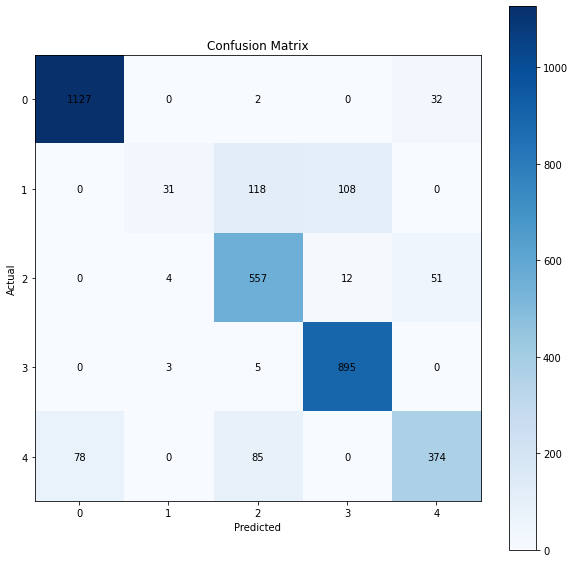

In [35]:
rand=RandomForestClassifier(criterion='entropy').fit(X_train_scaled,y_train)
accu_ran=round(accuracy_score(y_test,rand.predict(X_test_scaled)),3)
f1_score_ran=round(f1_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Precision_ran=round(precision_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
Recall_ran=round(recall_score(y_test,rand.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_ran)
print('F1_Score:',f1_score_ran)
print('Recall_Score:',Precision_ran)
print('Precision_Score:',Recall_ran)
print('Cross Validation Score:',(np.mean(cross_val_score(rand, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=rand.predict(X_test_scaled))
print(classification)
confusion = confusion_matrix(y_test, rand.predict(X_test_scaled))
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.733
F1_Score: 0.733
Recall_Score: 0.732
Precision_Score: 0.733
Cross Validation Score: 0.7375760870359914
                  precision    recall  f1-score   support

Extremely Severe     0.8631    0.8742    0.8686      1161
            Mild     0.3875    0.3619    0.3742       257
        Moderate     0.5888    0.6378    0.6123       624
          Normal     0.8904    0.8726    0.8814       903
          Severe     0.5149    0.4842    0.4990       537

        accuracy                         0.7335      3482
       macro avg     0.6489    0.6462    0.6471      3482
    weighted avg     0.7322    0.7335    0.7325      3482



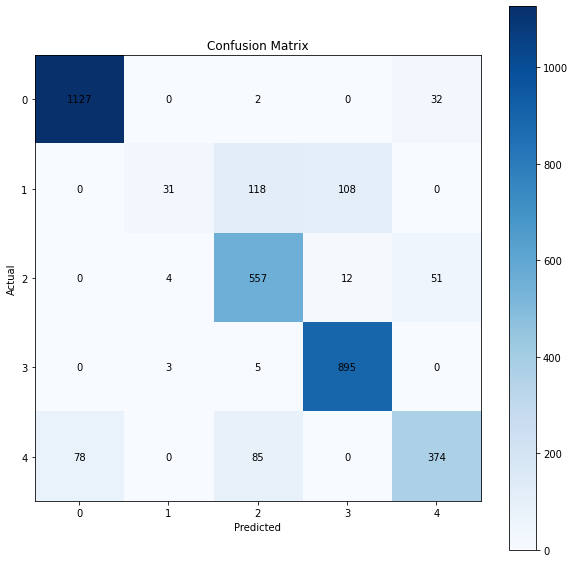

In [36]:
Dt=DecisionTreeClassifier(criterion='entropy',max_depth=100,min_samples_leaf=9,min_samples_split=3).fit(X_train_scaled,y_train)
accu_dt=round(accuracy_score(y_test,Dt.predict(X_test_scaled)),3)
f1_score_dt=round(f1_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Precision_dt=round(precision_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
Recall_dt=round(recall_score(y_test,Dt.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_dt)
print('F1_Score:',f1_score_dt)
print('Recall_Score:',Precision_dt)
print('Precision_Score:',Recall_dt)
print('Cross Validation Score:',(np.mean(cross_val_score(Dt, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Dt.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.816
F1_Score: 0.824
Recall_Score: 0.843
Precision_Score: 0.816


c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Cross Validation Score: 0.810794487140862
                  precision    recall  f1-score   support

Extremely Severe     0.9878    0.8338    0.9043      1161
            Mild     0.4800    0.5136    0.4962       257
        Moderate     0.7205    0.8429    0.7770       624
          Normal     0.9701    0.8616    0.9126       903
          Severe     0.6302    0.8156    0.7110       537

        accuracy                         0.8162      3482
       macro avg     0.7577    0.7735    0.7602      3482
    weighted avg     0.8427    0.8162    0.8237      3482



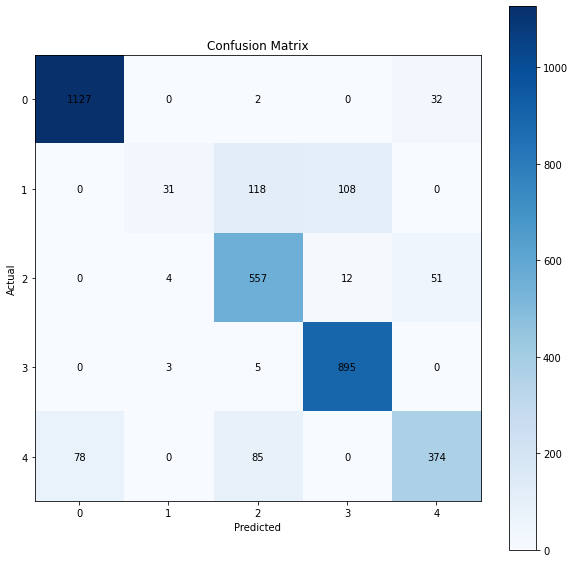

In [37]:
GB=GaussianNB().fit(X_train_scaled,y_train)
accu_gb=round(accuracy_score(y_test,GB.predict(X_test_scaled)),3)
f1_score_gb=round(f1_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Precision_gb=round(precision_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
Recall_gb=round(recall_score(y_test,GB.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_gb)
print('F1_Score:',f1_score_gb)
print('Recall_Score:',Precision_gb)
print('Precision_Score:',Recall_gb)
print('Cross Validation Score:',(np.mean(cross_val_score(GB, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=GB.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.791
F1_Score: 0.765
Recall_Score: 0.772
Precision_Score: 0.791


c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Python\Python36\lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

Cross Validation Score: 0.7974850250364992
                  precision    recall  f1-score   support

Extremely Severe     0.9512    0.9406    0.9459      1161
            Mild     0.3750    0.0700    0.1180       257
        Moderate     0.6625    0.7580    0.7070       624
          Normal     0.7436    0.9989    0.8526       903
          Severe     0.7521    0.5028    0.6027       537

        accuracy                         0.7912      3482
       macro avg     0.6969    0.6541    0.6452      3482
    weighted avg     0.7724    0.7912    0.7648      3482



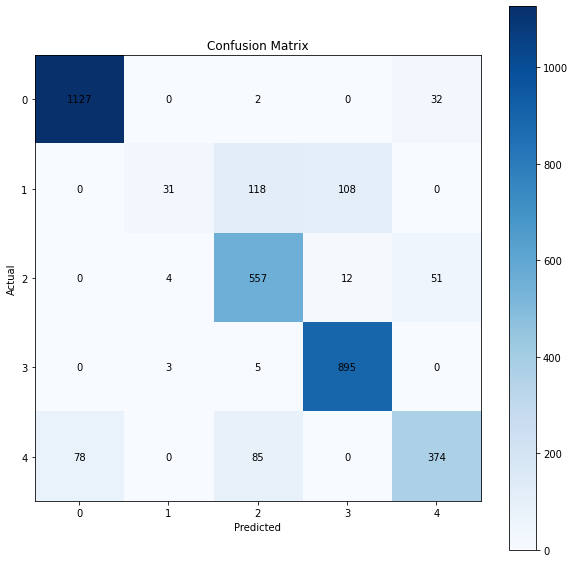

In [38]:
Knnr=KNeighborsClassifier(n_neighbors=19,weights='distance').fit(X_train_scaled,y_train)
accu_knn=round(accuracy_score(y_test,Knnr.predict(X_test_scaled)),3)
f1_score_knn=round(f1_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Precision_knn=round(precision_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
Recall_knn=round(recall_score(y_test,Knnr.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_knn)
print('F1_Score:',f1_score_knn)
print('Recall_Score:',Precision_knn)
print('Precision_Score:',Recall_knn)
print('Cross Validation Score:',(np.mean(cross_val_score(Knnr, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Knnr.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 1.0
F1_Score: 1.0
Recall_Score: 1.0
Precision_Score: 1.0


c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python36\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

Cross Validation Score: 1.0
                  precision    recall  f1-score   support

Extremely Severe     1.0000    1.0000    1.0000      1161
            Mild     1.0000    1.0000    1.0000       257
        Moderate     1.0000    1.0000    1.0000       624
          Normal     1.0000    1.0000    1.0000       903
          Severe     1.0000    1.0000    1.0000       537

        accuracy                         1.0000      3482
       macro avg     1.0000    1.0000    1.0000      3482
    weighted avg     1.0000    1.0000    1.0000      3482



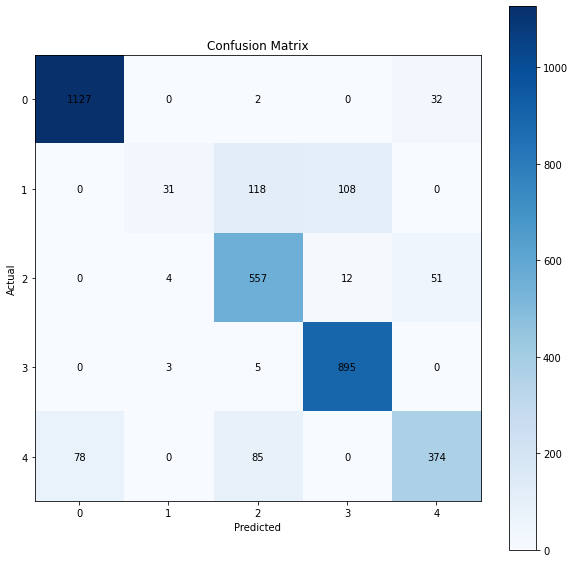

In [39]:
from sklearn.svm import SVC
Svmc=SVC(C=10,gamma=0.1,kernel='rbf').fit(X_train_scaled,y_train)
accu_svm=round(accuracy_score(y_test,Svmc.predict(X_test_scaled)),3)
f1_score_svm=round(f1_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Precision_svm=round(precision_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
Recall_svm=round(recall_score(y_test,Svmc.predict(X_test_scaled),average='weighted'),3)
print('Accuracy:',accu_svm)
print('F1_Score:',f1_score_svm)
print('Recall_Score:',Precision_svm)
print('Precision_Score:',Recall_svm)
print('Cross Validation Score:',(np.mean(cross_val_score(Svmc, X_train_scaled, y_train, cv = 6))))
classification=classification_report(
    digits=4,
    y_true=y_test,
    y_pred=Svmc.predict(X_test_scaled))
print(classification)
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(confusion, cmap=plt.cm.Blues)
for i in range(len(confusion)):
    for j in range(len(confusion[i])):
        text = ax.text(j, i, str(confusion[i, j]),
                       ha="center", va="center", color="black")

plt.colorbar(im)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
Result_2={
                  'Model':['Random-Forest','Decision-Tree','GaussianNB','Nearest-Neighbors','SVM'],
                  'Accuracy(%)':[accu_ran*100,accu_dt*100,accu_gb*100,accu_knn*100,accu_svm*100],
                  'F1_Score(%)':[f1_score_ran*100,f1_score_dt*100,f1_score_gb*100,f1_score_knn*100,f1_score_svm*100],
                  'Precision(%)':[Precision_ran*100,Precision_dt*100,Precision_gb*100,Precision_knn*100,Precision_svm*100],
                  'Recall(%)':[Recall_ran*100,Recall_dt*100,Recall_gb*100,Recall_knn*100,Recall_svm*100]
        
                    }
Result_Anxiety=pd.DataFrame(Result_2)

In [41]:
Result_Anxiety

,Model,Accuracy(%),F1_Score(%),Precision(%),Recall(%)
0,Random-Forest,85.7,83.5,85.7,85.7
1,Decision-Tree,73.3,73.3,73.2,73.3
2,GaussianNB,81.6,82.4,84.3,81.6
3,Nearest-Neighbors,79.1,76.5,77.2,79.1
4,SVM,100.0,100.0,100.0,100.0


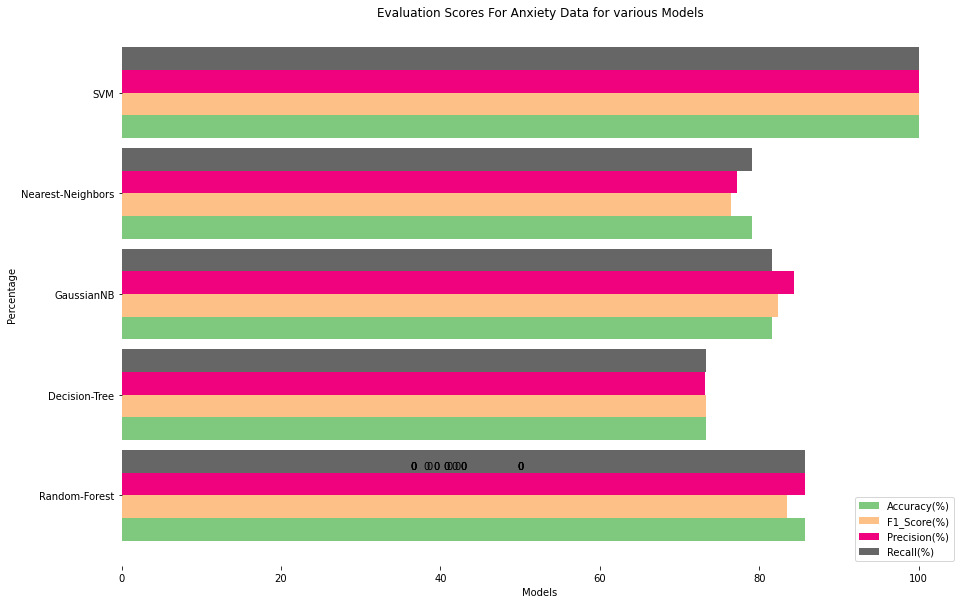

In [42]:
slot=Result_Anxiety.plot(x='Model',y=['Accuracy(%)','F1_Score(%)','Precision(%)','Recall(%)'],kind='barh',figsize=(15,10),cmap='Accent',width=0.9)
for p in slot.patches:
    slot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 7),
                   textcoords='offset points')
plt.title('Evaluation Scores For Anxiety Data for various Models')
plt.ylabel('Percentage')
plt.xlabel('Models')
for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [43]:
import pickle
pickle.dump(Svmc, open('Anxiety_model.pkl','wb'))

In [44]:
model = pickle.load(open('Anxiety_model.pkl','rb'))